<a href="https://colab.research.google.com/github/julianovale/PO450/blob/main/Semana07_PO450_Atividade05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Juliano Cesar Rodrigues Vale - Atividade 5

# RA: 265750

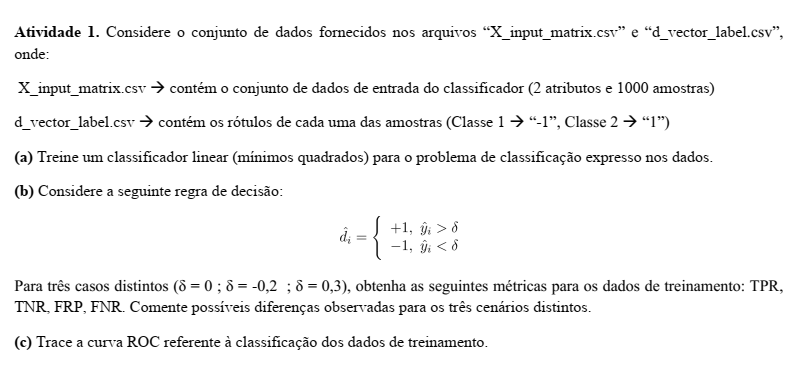

In [187]:
# importando bibliotecas

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, roc_curve, plot_roc_curve, confusion_matrix, ConfusionMatrixDisplay

In [188]:
# leitura dos dados

X_url = 'https://raw.githubusercontent.com/julianovale/PO450/main/semana07/X_input_matrix.csv'
d_url = 'https://raw.githubusercontent.com/julianovale/PO450/main/semana07/d_vector_label.csv'
x = np.loadtxt(X_url, delimiter=',')
d = np.loadtxt(d_url, delimiter=',')
dfx = pd.DataFrame(x, columns=['Var01','Var02'])
dfd = pd.DataFrame(d, columns=['d'])
df = pd.concat([dfx, dfd], axis=1)
df.head()

,Var01,Var02,d
0,9.048768,8.506883,1.0
1,4.403171,4.467171,1.0
2,0.885328,9.306700,-1.0
3,4.598181,7.436493,1.0
4,1.367086,8.623110,1.0


## Item (a)

In [189]:
# splitando treinamento e teste
prop_test = 0.3
X_train, X_test, d_train, d_test = train_test_split(df[['Var01','Var02']], df['d'], test_size = prop_test)

In [190]:
# criando instância e ajustando o modelo
model_reg_linear = LinearRegression()
model_reg_linear.fit(X_train, d_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Item (b) ($\delta$ = 0)

In [191]:
# predizendo e calculando acurácia

delta = 0

y_hat_train = model_reg_linear.predict(X_train)
d_hat_train = np.where((y_hat_train >= delta), 1, -1)
print('************* Relatório do treinamento **************')
print(classification_report(d_train, d_hat_train))
print()

y_hat_test = model_reg_linear.predict(X_test)
d_hat_test = np.where((y_hat_test >= delta), 1, -1)
print('*************** Relatório do teste ******************')
print(classification_report(d_test, d_hat_test))

************* Relatório do treinamento **************
              precision    recall  f1-score   support

        -1.0       0.89      0.87      0.88       341
         1.0       0.88      0.90      0.89       359

    accuracy                           0.89       700
   macro avg       0.89      0.89      0.89       700
weighted avg       0.89      0.89      0.89       700


*************** Relatório do teste ******************
              precision    recall  f1-score   support

        -1.0       0.87      0.91      0.89       159
         1.0       0.89      0.84      0.87       141

    accuracy                           0.88       300
   macro avg       0.88      0.87      0.88       300
weighted avg       0.88      0.88      0.88       300



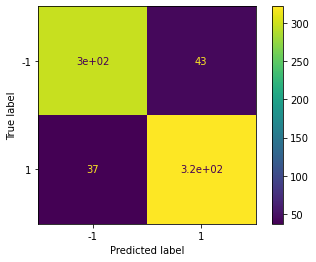

In [192]:
Conf_Matrix = confusion_matrix(d_train, d_hat_train)
disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix,display_labels=(-1,1))
disp.plot();

In [193]:
TN = Conf_Matrix[0][0]
FP = Conf_Matrix[0][1]
FN = Conf_Matrix[1][0]
TP = Conf_Matrix[1][1]
P = FN+TP
N = TN+FP
TPR = TP/P
TNR = TN/N
FPR = FP/N
FNR = FN/P

print('****** Relatório de métricas ******')
print('TPR = ', TPR)
print('TNR = ', TNR)
print('FPR = ', FPR)
print('FNR = ', FNR)

****** Relatório de métricas ******
TPR =  0.8969359331476323
TNR =  0.873900293255132
FPR =  0.12609970674486803
FNR =  0.10306406685236769


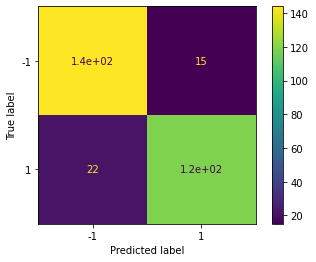

In [194]:
Conf_Matrix = confusion_matrix(d_test, d_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix,display_labels=(-1,1))
disp.plot();

In [195]:
TN = Conf_Matrix[0][0]
FP = Conf_Matrix[0][1]
FN = Conf_Matrix[1][0]
TP = Conf_Matrix[1][1]
P = FN+TP
N = TN+FP
TPR = TP/P
TNR = TN/N
FPR = FP/N
FNR = FN/P

print('****** Relatório de métricas ******')
print('TPR = ', TPR)
print('TNR = ', TNR)
print('FPR = ', FPR)
print('FNR = ', FNR)

****** Relatório de métricas ******
TPR =  0.8439716312056738
TNR =  0.9056603773584906
FPR =  0.09433962264150944
FNR =  0.15602836879432624


## Item (c) ($\delta$ = 0)

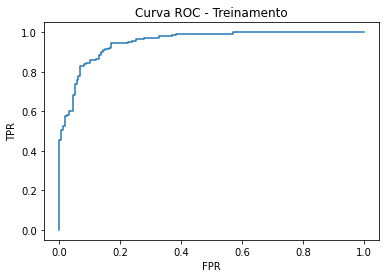

In [196]:
# Curva ROC

fpr_c, tpr_c, thresholds = roc_curve(d_test, y_hat_test)

plt.plot(fpr_c, tpr_c)
plt.title("Curva ROC - Treinamento")
plt.xlabel("FPR")
plt.ylabel("TPR");

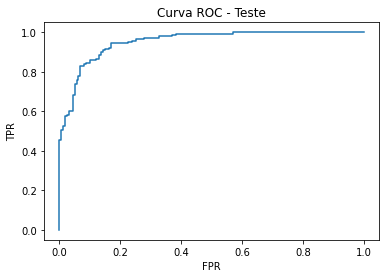

In [197]:
# Curva ROC

fpr, tpr, thresholds = roc_curve(d_test, y_hat_test)

plt.plot(fpr, tpr)
plt.title("Curva ROC - Teste")
plt.xlabel("FPR")
plt.ylabel("TPR");

## Item (b) ($\delta$ = -0.2)

In [198]:
# predizendo e calculando acurácia

delta = -0.2

y_hat_train = model_reg_linear.predict(X_train)
d_hat_train = np.where((y_hat_train >= delta), 1, -1)
print('************* Relatório do treinamento **************')
print(classification_report(d_train, d_hat_train))
print()

y_hat_test = model_reg_linear.predict(X_test)
d_hat_test = np.where((y_hat_test >= delta), 1, -1)
print('*************** Relatório do teste ******************')
print(classification_report(d_test, d_hat_test))

************* Relatório do treinamento **************
              precision    recall  f1-score   support

        -1.0       0.94      0.79      0.86       341
         1.0       0.83      0.96      0.89       359

    accuracy                           0.88       700
   macro avg       0.89      0.87      0.87       700
weighted avg       0.88      0.88      0.87       700


*************** Relatório do teste ******************
              precision    recall  f1-score   support

        -1.0       0.94      0.78      0.85       159
         1.0       0.79      0.94      0.86       141

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300



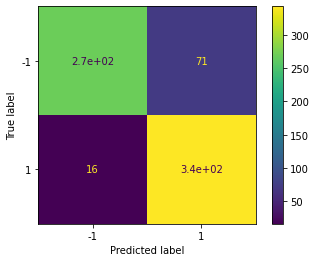

In [199]:
Conf_Matrix = confusion_matrix(d_train, d_hat_train)
disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix,display_labels=(-1,1))
disp.plot();

In [200]:
TN = Conf_Matrix[0][0]
FP = Conf_Matrix[0][1]
FN = Conf_Matrix[1][0]
TP = Conf_Matrix[1][1]
P = FN+TP
N = TN+FP
TPR = TP/P
TNR = TN/N
FPR = FP/N
FNR = FN/P

print('****** Relatório de métricas ******')
print('TPR = ', TPR)
print('TNR = ', TNR)
print('FPR = ', FPR)
print('FNR = ', FNR)

****** Relatório de métricas ******
TPR =  0.9554317548746518
TNR =  0.7917888563049853
FPR =  0.20821114369501467
FNR =  0.04456824512534819


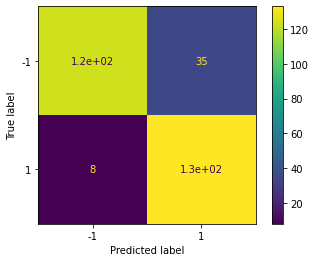

In [201]:
Conf_Matrix = confusion_matrix(d_test, d_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix,display_labels=(-1,1))
disp.plot();

In [202]:
TN = Conf_Matrix[0][0]
FP = Conf_Matrix[0][1]
FN = Conf_Matrix[1][0]
TP = Conf_Matrix[1][1]
P = FN+TP
N = TN+FP
TPR = TP/P
TNR = TN/N
FPR = FP/N
FNR = FN/P

print('****** Relatório de métricas ******')
print('TPR = ', TPR)
print('TNR = ', TNR)
print('FPR = ', FPR)
print('FNR = ', FNR)

****** Relatório de métricas ******
TPR =  0.9432624113475178
TNR =  0.779874213836478
FPR =  0.22012578616352202
FNR =  0.05673758865248227


## Item (c) ($\delta$ = -0.2)

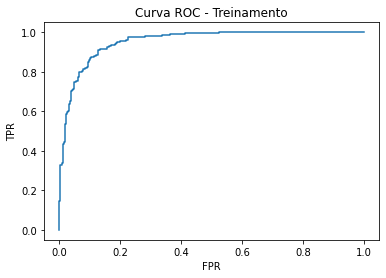

In [203]:
# Curva ROC

fpr, tpr, thresholds = roc_curve(d_train, y_hat_train)

plt.plot(fpr, tpr)
plt.title("Curva ROC - Treinamento")
plt.xlabel("FPR")
plt.ylabel("TPR");

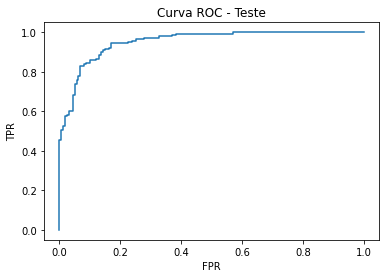

In [204]:
# Curva ROC

fpr, tpr, thresholds = roc_curve(d_test, y_hat_test)

plt.plot(fpr, tpr)
plt.title("Curva ROC - Teste")
plt.xlabel("FPR")
plt.ylabel("TPR");

## Item (b) ($\delta$ = 0.3)

In [205]:
# predizendo e calculando acurácia

delta = 0.3

y_hat_train = model_reg_linear.predict(X_train)
d_hat_train = np.where((y_hat_train >= delta), 1, -1)
print('************* Relatório do treinamento **************')
print(classification_report(d_train, d_hat_train))
print()

y_hat_test = model_reg_linear.predict(X_test)
d_hat_test = np.where((y_hat_test >= delta), 1, -1)
print('*************** Relatório do teste ******************')
print(classification_report(d_test, d_hat_test))

************* Relatório do treinamento **************
              precision    recall  f1-score   support

        -1.0       0.77      0.95      0.85       341
         1.0       0.94      0.73      0.82       359

    accuracy                           0.84       700
   macro avg       0.86      0.84      0.84       700
weighted avg       0.86      0.84      0.84       700


*************** Relatório do teste ******************
              precision    recall  f1-score   support

        -1.0       0.75      0.96      0.84       159
         1.0       0.93      0.64      0.76       141

    accuracy                           0.81       300
   macro avg       0.84      0.80      0.80       300
weighted avg       0.83      0.81      0.80       300



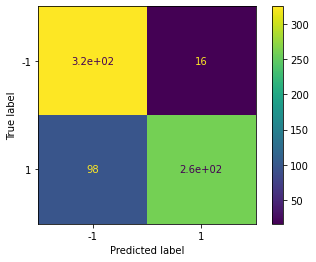

In [206]:
Conf_Matrix = confusion_matrix(d_train, d_hat_train)
disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix,display_labels=(-1,1))
disp.plot();

In [207]:
TN = Conf_Matrix[0][0]
FP = Conf_Matrix[0][1]
FN = Conf_Matrix[1][0]
TP = Conf_Matrix[1][1]
P = FN+TP
N = TN+FP
TPR = TP/P
TNR = TN/N
FPR = FP/N
FNR = FN/P

print('****** Relatório de métricas ******')
print('TPR = ', TPR)
print('TNR = ', TNR)
print('FPR = ', FPR)
print('FNR = ', FNR)

****** Relatório de métricas ******
TPR =  0.7270194986072424
TNR =  0.9530791788856305
FPR =  0.0469208211143695
FNR =  0.27298050139275765


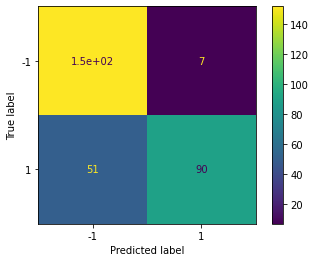

In [208]:
Conf_Matrix = confusion_matrix(d_test, d_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=Conf_Matrix,display_labels=(-1,1))
disp.plot();

In [209]:
TN = Conf_Matrix[0][0]
FP = Conf_Matrix[0][1]
FN = Conf_Matrix[1][0]
TP = Conf_Matrix[1][1]
P = FN+TP
N = TN+FP
TPR = TP/P
TNR = TN/N
FPR = FP/N
FNR = FN/P

print('****** Relatório de métricas ******')
print('TPR = ', TPR)
print('TNR = ', TNR)
print('FPR = ', FPR)
print('FNR = ', FNR)

****** Relatório de métricas ******
TPR =  0.6382978723404256
TNR =  0.9559748427672956
FPR =  0.0440251572327044
FNR =  0.3617021276595745


## Item (c) ($\delta$ = 0.3)

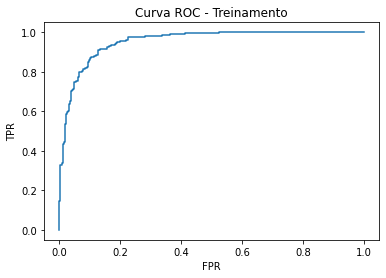

In [210]:
# Curva ROC

fpr, tpr, thresholds = roc_curve(d_train, y_hat_train)

plt.plot(fpr, tpr)
plt.title("Curva ROC - Treinamento")
plt.xlabel("FPR")
plt.ylabel("TPR");

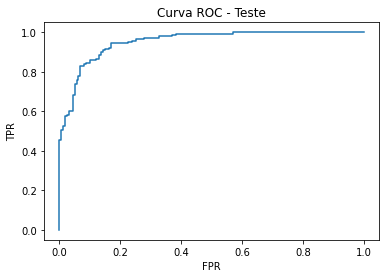

In [211]:
# Curva ROC

fpr, tpr, thresholds = roc_curve(d_test, y_hat_test)

plt.plot(fpr, tpr)
plt.title("Curva ROC - Teste")
plt.xlabel("FPR")
plt.ylabel("TPR");

## Comentários

Trabalhando com diferentes valores de $\delta$ pudemos observar variações importantes de acurácia, a saber,  $\delta$ = 0; -0.2; e, 3, respectivamente, ACC = 0.88; 0.86; e, 0.81. Poderíamos assumir que $\delta = 0$  é a situação que traz o melhor resultado e, de fato, do ponto de vista da predição pura isso é uma verdade, mas a análise de uma situação prática hipotética pode revelar a utilidade de se alterar o limiar do classificador. Vejamos:

Suponha que tal teste se trate de um exame preliminar para detecção de determinado câncer. Examinando o limiar  $\delta = 0$ , que é neutro: o modelo vai acertar a predição para 88% das amostras, entretanto, com 15,6% de falsos negativos. A tendência é de que 15,6% dos pacientes portadores de câncer que se submeteram a tal exame não façam exames mais detalhados e não descubram a doença para um tratamento precoce. 

Analisando o limiar  $\delta = -0.2$, neste caso o TPR e FPR aumentam, privilegiando a classificação como positivo. Para o nossa situação hipotética do exame preliminar de câncer, essa alternativa seria mais adequada, pois mais pacientes seriam classificados como positivos e fariam exames mais detalhados. Ainda que ocorressem alarmes falso, somente 5,6% (FNR) dos pacientes correriam o risco de ter a doença sem a possibilidade de um tratamento precoce.

O limiar  $\delta = 0.3$ é o que apresenta a menor acurácia e privilegia a classificação como negativo, aumentando o TNR e FNR, para nossa situação hipotética seria a pior escolha, pois 27,3% dos pacientes portadores do câncer sendo diagnosticados como "negativo" não teriam a oportunidade de realizar exames mais detalhados e estariam sujeitos à evolução da doença.

Em outras situações, entrentanto, os limiares  $\delta = 0$ e  $\delta = 0.3$ poderiam ser os mais adequados. Acredito que esta seja a lição subjacente à atividade. 